In [71]:
import datetime as dt
import pandas_datareader as pdr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
from mpl_finance import candlestick_ohlc

import warnings
warnings.filterwarnings("ignore")

In [72]:
tickers = ['AAPL', 'MSFT', 'AMZN', 'GOOG'] # Apple , Microsoft, Amazon, Google
amounts = [700, 1100, 150, 900] # Amount of each stock
prices = [] # List of prices
total = [] # List of total values

In [73]:
start_date = dt.datetime(2010, 1, 1)
now_date = dt.datetime.now()

for ticker in tickers:
    df = pdr.get_data_yahoo(ticker, start_date, now_date)
    
    price = df[-1:]['Close'][0]
    
    prices.append(price)
    index = tickers.index(ticker)
    
    total.append(amounts[index] * price)
    

In [74]:
prices

[169.389892578125, 292.92999267578125, 3124.9599609375, 2674.320068359375]

In [75]:
total

[118572.9248046875, 322222.9919433594, 468743.994140625, 2406888.0615234375]

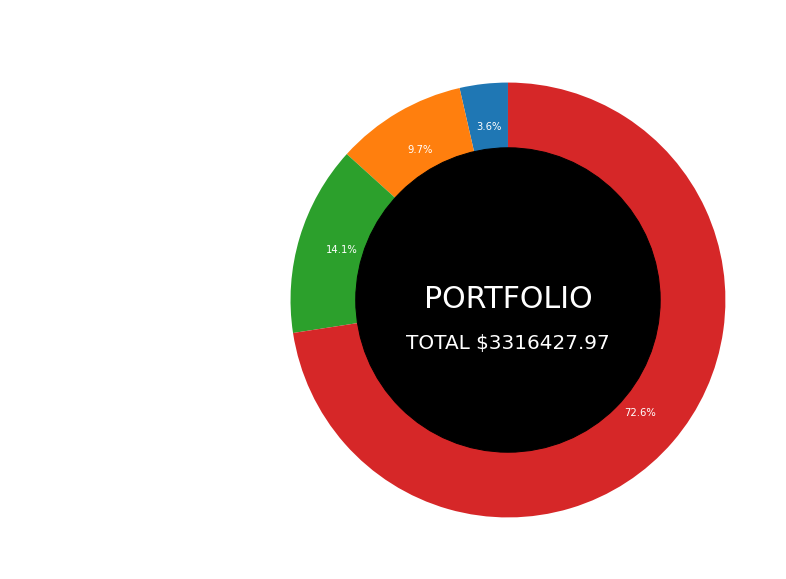

In [77]:
# Using pie chart to show the total value of each stock

fig, ax = plt.subplots(figsize=(10,10))

ax.set_title('Total Value of Stocks', fontsize=20,color='white')

ax.set_facecolor('white')

ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')

_,texts,_ =ax.pie(total, labels=tickers, autopct='%1.1f%%', textprops={'color':'white'},pctdistance=0.8, startangle=90)
[text.set_color('white') for text in texts]

# Create ring chart (masking)
my_circle=plt.Circle((0,0),0.7,color='black')
plt.gca().add_artist(my_circle)

ax.text(0,0,'PORTFOLIO', fontsize=30,color='white', ha='center', va='center')
ax.text(0.0,-0.2,f'TOTAL ${sum(total):.2f}', fontsize=20,color='white', ha='center', va='center')

counter = 0.15
ax.text(-1.8,0.9,f'Company wise Charts', fontsize=20,color='white', ha='center', va='center')
ax.text(-1.8,0.8,f'-------------------', fontsize=20,color='white', ha='center', va='center')
for ticker in tickers:
    ax.text(-1.8,counter,f'{ticker} ${total[tickers.index(ticker)]:.2f}', fontsize=20,color='white', ha='center', va='center')
    counter += 0.15

plt.show();